# Explore here

1) recopilación de datos
la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019.

In [2]:
import pandas as pd

#Recopila los datos del archivo csv
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

#Lee las tablas 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Se guarda archivo en ./data/raw

data.to_csv("../data/raw/datos_Airbnb.csv")

2) Exploración y limpieza de datos

In [4]:
#Obtener las dimensiones 
data.shape

#Tenemos 48895 filas con 16 columnas 

(48895, 16)

In [5]:
#Revisa los datos y sus tipos  
data.info()

#Nos da varios NaN en : last_review y reviews_per_month . Toda variable que no cumpla con el total de los datos (48895) tiene NaN
#Division:
    #Categorico: id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365
    #Numerico: latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#Revisa los duplicados 

print(f"ID {data['id'].duplicated().sum()}")
print(f"Name {data['name'].duplicated().sum()}")
print(f"Host ID {data['host_id'].duplicated().sum()}")

#No hay duplicados segun nos da por la variable data['id']


ID 0
Name 989
Host ID 11438


In [7]:
#Se elimina datos irrelevante
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


3)  Análisis de variables univariadas

/tmp/ipykernel_717/2670936244.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90) #rotar los valore del eje X


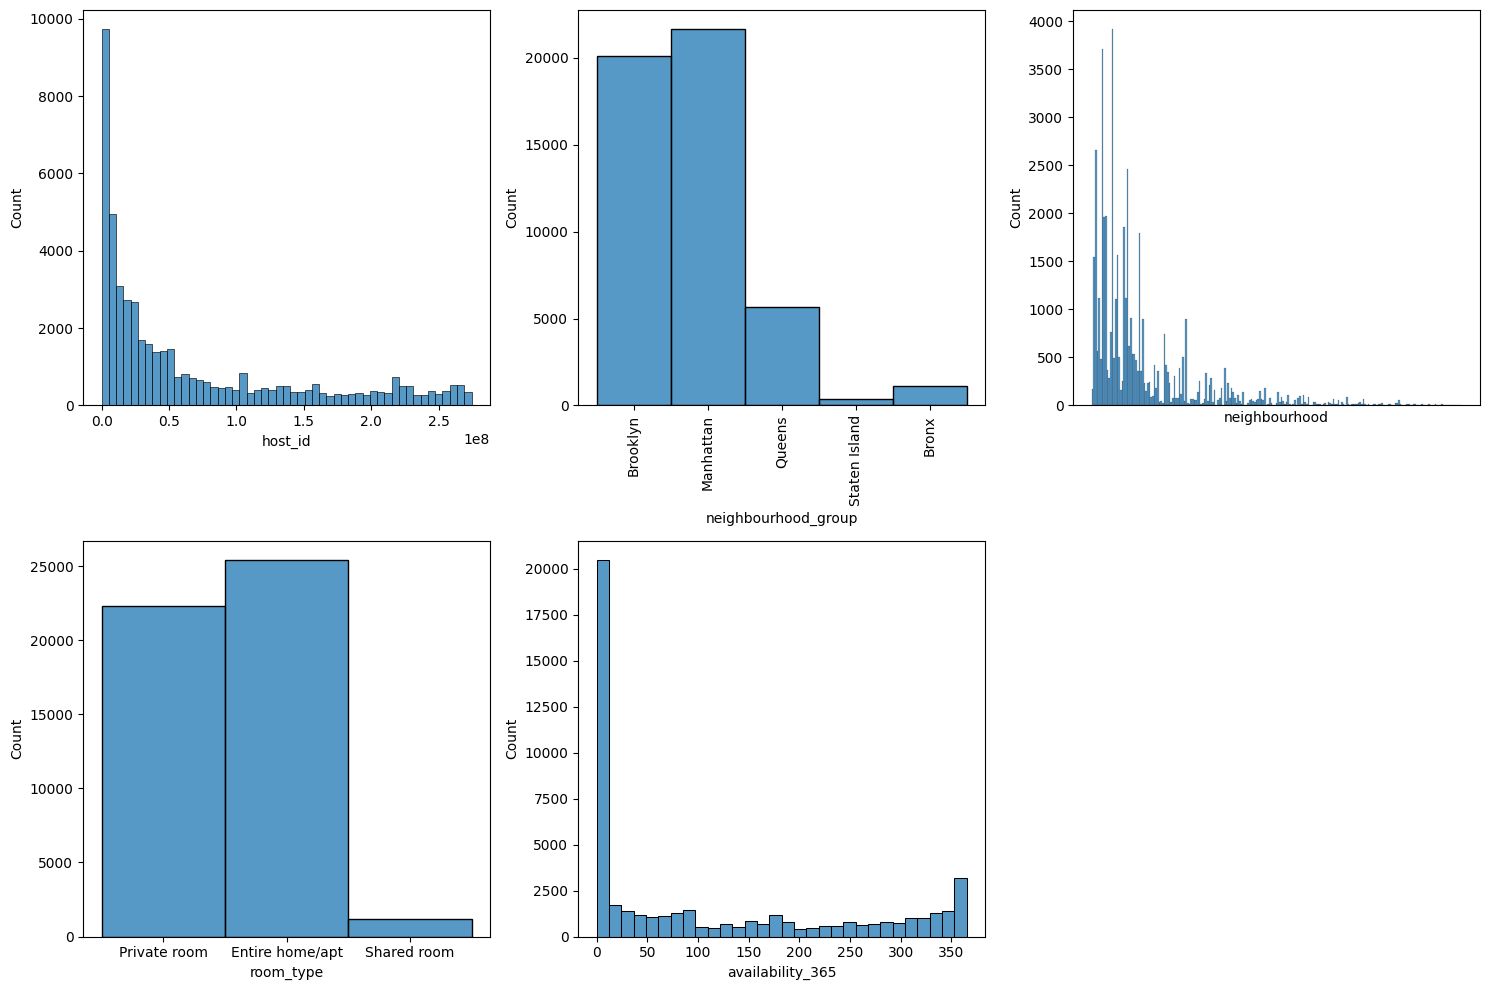

In [8]:
# Analisis variables categoricas 
# host_id, neighbourhood_group, neighbourhood, room_type y availability_365

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

# Creacion del histograma 
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group")
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=90) #rotar los valore del eje X

sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar layout
plt.tight_layout()

# mostrar grafico 
plt.show()

# Observamos 
#Host_id : existen varios NA 
#neighbourhood_group : Observamos 5 grupos de vecindarios , donde manhattan y brooklyn presentan una mayor cantidad de alquiler de viviendas en Nueva York
#room_type: tenemos 3 tipos (cuarto privado, casa completa y cuarto compartido), la que mayor cantidad de registro tiene es casa completa y cuarto privado.
#availability_365 : Observamos varios registros en 0 . Mientras que existen datos que demuestra que hay varios alquileres disponibles durante el año 

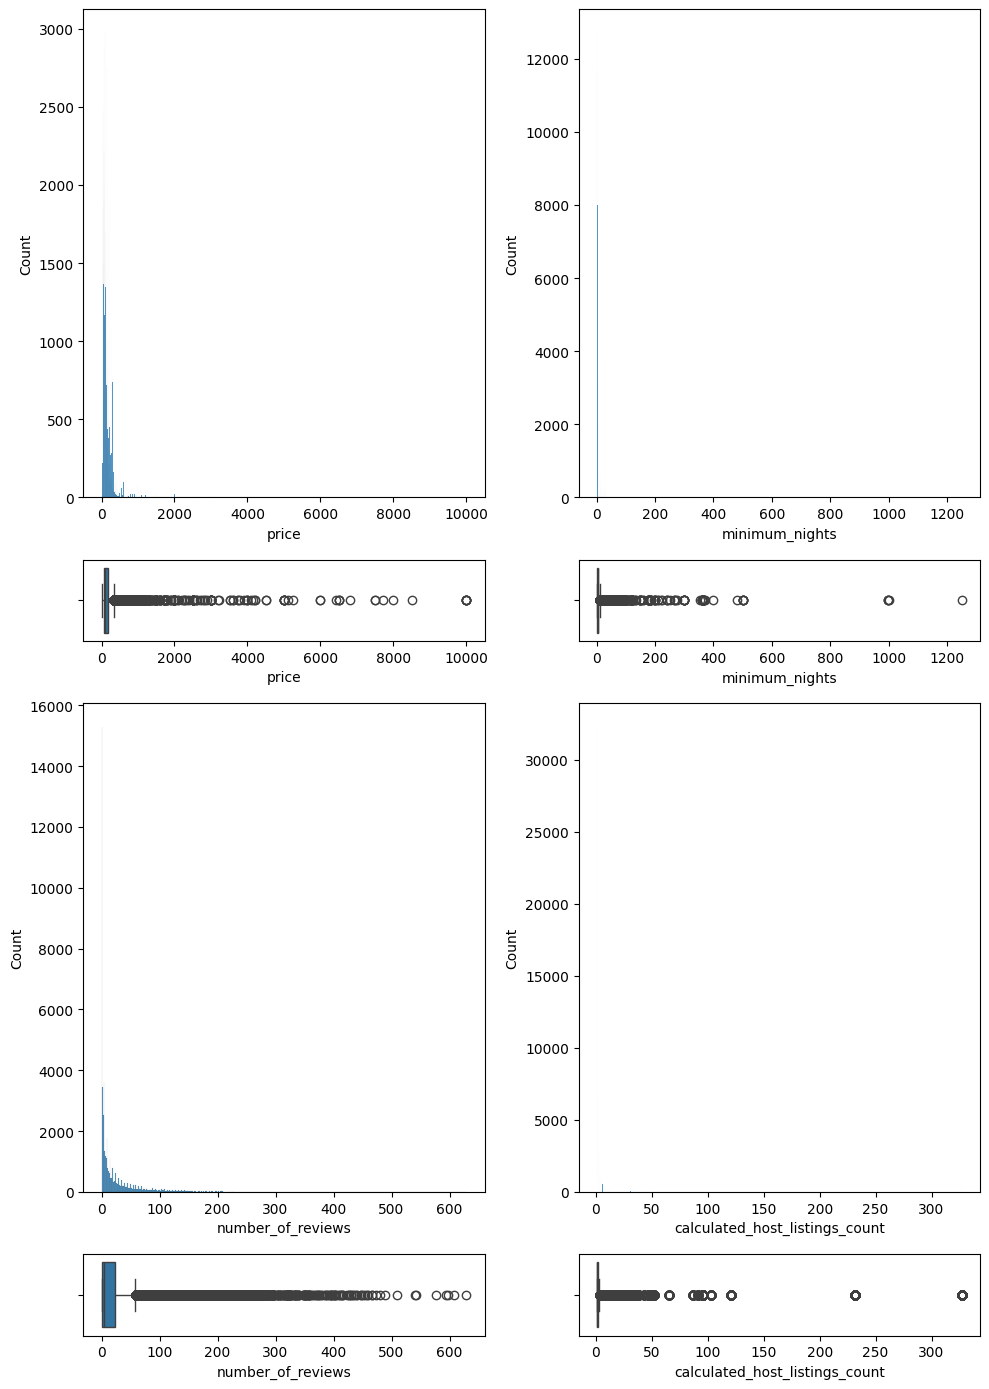

In [12]:
#Análisis sobre variables numéricas
#Variables Numericas :latitude, longitude, price, minimum_nights, number_of_reviews, calculated_host_listings_count
#No es necesario graficar latitude y longitude

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")

sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count")

# Austar layout
plt.tight_layout()

# Mostrar graficos 
plt.show()

#Observamos: Muchos datos disperos , siendo atípicos que están lejos de la distribución estándar y que sus distribuciones son asimétricos

4) Análisis de variables multivariadas

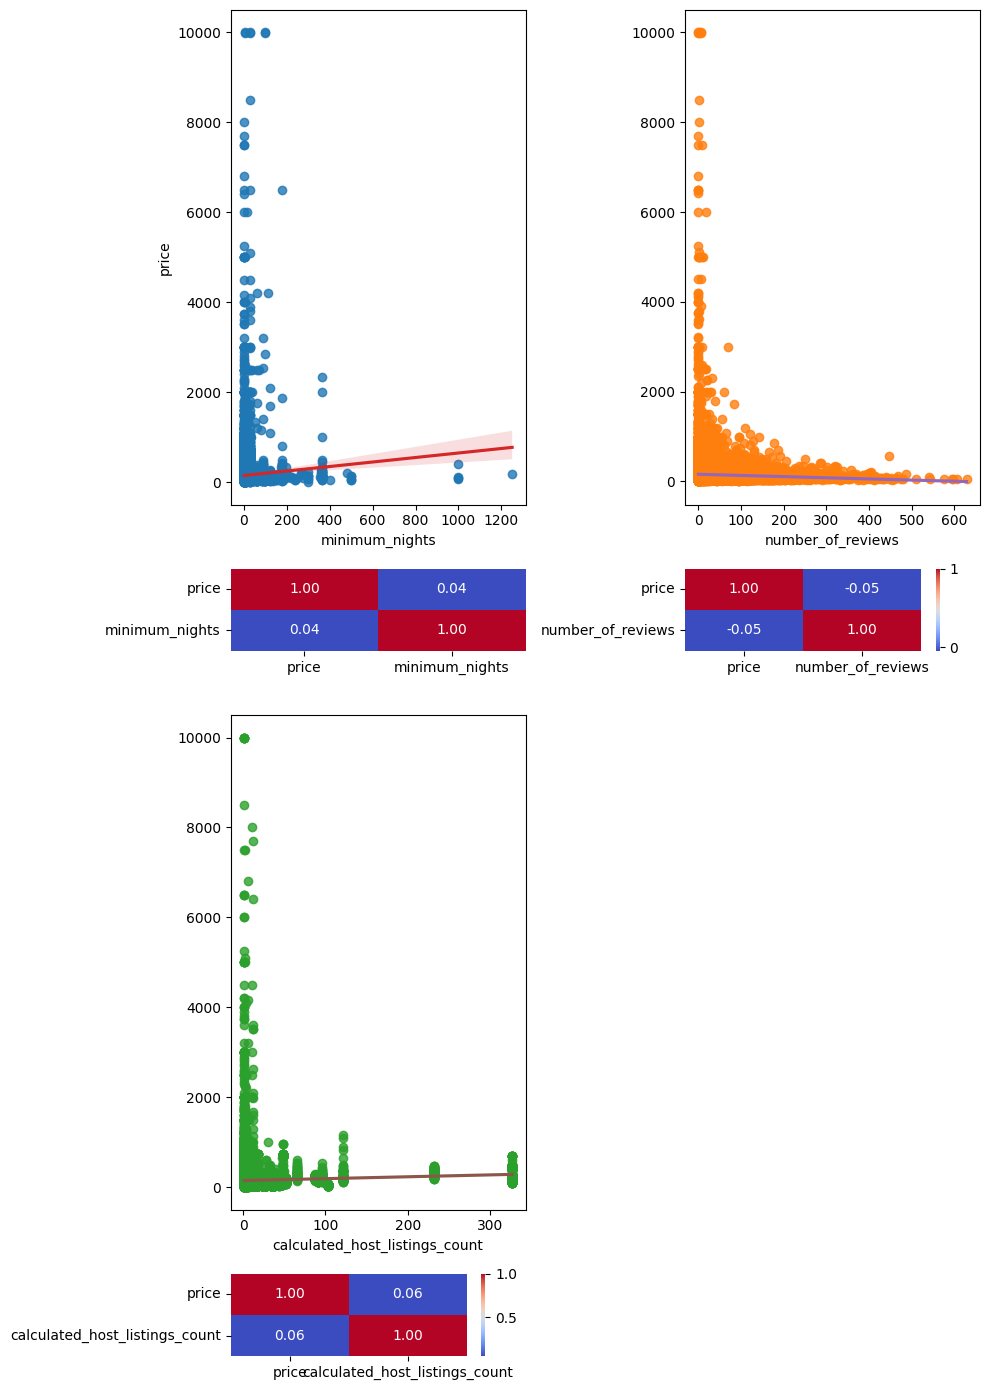

In [16]:
#Análisis numérico-numérico

# Crear la figura y ejes
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear los gráficos de regresión con colores asignados directamente
sns.regplot(ax=axis[0, 0], data=data, x="minimum_nights", y="price", 
            scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#d62728'})
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False, cmap='coolwarm')

sns.regplot(ax=axis[0, 1], data=data, x="number_of_reviews", y="price", 
            scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap='coolwarm')

sns.regplot(ax=axis[2, 0], data=data, x="calculated_host_listings_count", y="price", 
            scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#8c564b'}).set(ylabel=None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cmap='coolwarm').set(ylabel=None)

# Eliminar ejes vacíos
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Observamos 
# No existe relación entre el precio y el número mínimo de noches.
# No existe relación entre el número de reseñas y el precio.